# 3장. 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

`watermark`는 주피터 노트북에 사용하는 파이썬 패키지를 출력하기 위한 유틸리티입니다. `watermark` 패키지를 설치하려면 다음 셀의 주석을 제거한 뒤 실행하세요.

In [ ]:
#!pip install watermark

In [ ]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

last updated: 2020-05-22 

numpy 1.18.4
pandas 1.0.3
matplotlib 3.2.1
sklearn 0.23.1


# 사이킷런 첫걸음

사이킷런에서 붓꽃 데이터셋을 적재합니다. 세 번째 열은 꽃잎의 길이이고 네 번째 열은 꽃잎의 너비입니다. 클래스는 이미 정수 레이블로 변환되어 있습니다. 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


특성을 표준화합니다:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

30% for test_set , random_seed=1 random_mixing before spliting dataset

stratification: making proportion of class label of train_set and test_set like the input dataset

StandardScaler.fit() : calculating for standard deviation and average in each property dimension

np.unique(): returning class labels of factor //pyplot.scatter(): pointing

아달린에서는 항등함수를 활성화 함수로 사용// 로지스틱 회귀에서는 시그모이드 함수를 사용

sigmoid:1/(1+e^x)

lr(LogisticRegression).predict_proba: 훈련 샘플이 어떤 클래스에 속할 확률

규제를 사용하여 모델의 복잡도를 조정, 규제 하이퍼 파라미터를 사용해 가중치를 조절( 규제항은 모델 훈련 과정에서 가중치를 줄이는 역할을 한다.

## 사이킷런으로 퍼셉트론 훈련하기

2장의 `plot_decision_region` 함수를 다시 사용하겠습니다:

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [ ]:
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.98


In [ ]:
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.98


VV

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])#unique(): 유일한 값만 골라내기, 예를들어 1 2 2 3 2 4 4 이렇게 있다면 1 2 3 4만 남도록

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), #x1_min~x1_max 사이의 값을 resolution(여기서는 0.02)간격으로 정방행렬로 만듬
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #ravel()함수는 flatten()함수와 기능이 비슷(평평하게 해주는 역할), reshape과 반대 개념 
                                                                     #predict()는 단위 계단 함수를 사용하여 클래스 레이블(0,1,2)을 반환
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 3차원 자료를 등고선 그래프로 시각화 하기위한 함수(이를 위해 meshgrid로 그리드 포인트 행렬을 만듬)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, #여기서 alpha란 투명도를 뜻함 0이면 완전 투명, 1이면 완전 불투명
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

표준화된 훈련 데이터를 사용하여 퍼셉트론 모델을 훈련합니다:

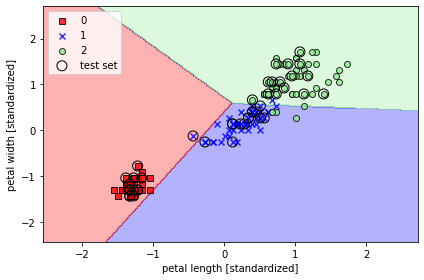

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 로지스틱 회귀를 사용한 클래스 확률 모델링

### 로지스틱 회귀의 이해와 조건부 확률

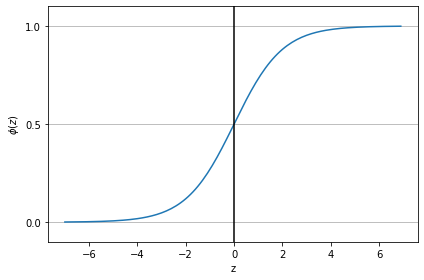

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### 로지스틱 비용 함수의 가중치 학습하기

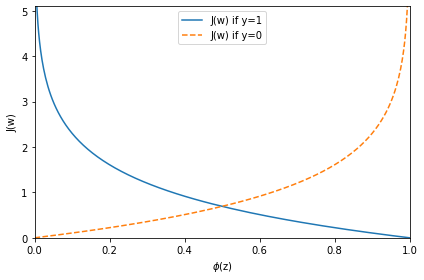

In [ ]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

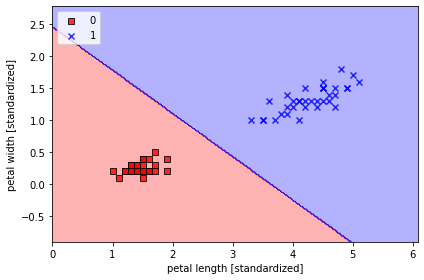

In [ ]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 사이킷런을 사용해 로지스틱 회귀 모델 훈련하기

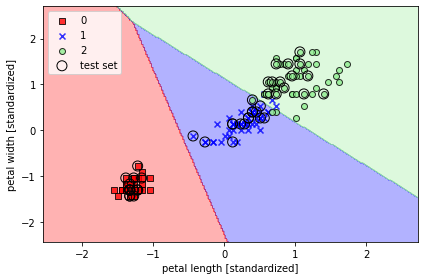

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 규제를 사용해 과대적합 피하기 VV


![대체 텍스트](https://drive.google.com/uc?export=view&id=1zi1O_ifBsDysakB6DIB13Xnl0T18BquO)

<과대 적합과 과소적합이 결정 경계에 미치는 영향>

첫번째 사진: 과소적합(편향이 큼)

두번째 사진: 좋은 절충점

세번째 사진: 과대적합(높은분산)

분산이란 모델을 여러번 훈련햇을 때 특정 샘플에 대한 일관성 또는 변동성을 측정

편합은 다른 훈련 데이터셋에서 여러 번 훈련햇을때 예측이 정확한 값에서 얼마나 빗나갔는지 측정


---


좋은 편향-분산 트레이드 오프를 찾기위해
규제를 사용하여 모델의 복잡도를 조정할수있음

> 특성간의 높은 상관관계를 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할수 있음

> 과도한 파라미터(가중치)값을 제한하기 위해 추가적인 정보(편향)을 주입하는 개념

과대적합을 피하는 이유는 훈련데이터에 대해서는 높은성능을 보이지만 함수의 복잡도가 너무 높아  훈련데이터 

이외의 변수에는 대응이 힘듬, 예를들어 데이터에서 미묘한 패턴을 감지할수있어  훈련 데이터셋에 잡음이 

많거나 데이터가 너무 적으면 잡음이 섞인 패턴을 감지하여 학습할 수 있음.

---
Overfitting을 해결하는 방법
1. 훈련 데이터를 더 많이 모음
2. 정규화(Regularization) - 규제(제약 조건), 드롭-아웃 등 다양한 방법을 이용해서 적당한 복잡도를 가지는 모델을 자동적으로 찾아주는 기법
3. 훈련 데이터 잡음을 줄임(오류 수정과 이상치 제거)

일반화(generalization)는 테스트 데이터에 대한 높은 성능을 갖추는 것을 의미합니다.
즉, 테스트 데이터를 입력하였을 때 output의 정확도가 높은 것을 의미.

---
가장 일반적인 규제 형태는 L2형태이다.


> 규제 하이퍼 파라미터 람다를 사용하여 모델 훈련과정에서 가중치를 줄일수있음

람다를 증가시킬수록 규제 강도가 높아짐

사이킷런의 LogisticRegression클래스의 매개변수 C는 람다의 역수인데

따라서, C를 감소시킬수록 규제 강도가 증가함







In [ ]:
weights, params=[],[]
for c in np.arange(-5,5):
  

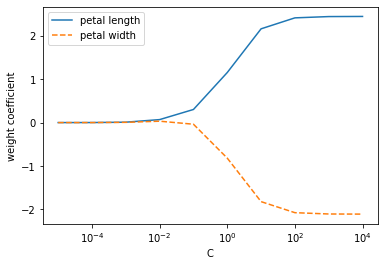

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# 서포트 벡터 머신을 사용한 최대 마진 분류 VV

SVM: 학습 알고리즘, 마진을 최대화( 마진: 결정 경계와 그에 가장 가까운 훈련 샘플 사이의 거리)
이 샘플 들을 서포트 벡터라고 함(support vector)

---

마진이 크면 일반화 오차가 낮아지는 경향이 있고 작은 마진의 모델은 과대적합 되기 쉬움]

 
*   SVM은 서포트 벡터에 대부분 관심을 둠
*   로지스틱 회귀는 업데이트가 용이하므로 스트리밍 데이터를 다룰때 적합, 간단하고 구현쉬움




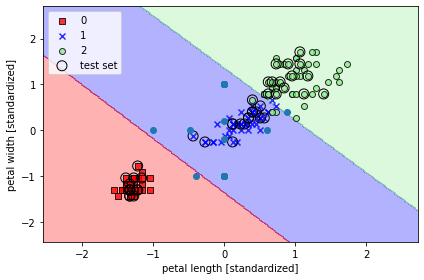

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
svm.coef_

array([[-1.28108835, -1.08908074],
       [-0.68216416, -0.56900015],
       [-2.20580665, -1.9370517 ]])

In [ ]:
svm.dual_coef_, svm.dual_coef_.shape

(array([[ 0.88134491,  0.60379849, -1.        , -0.        , -0.        ,
         -0.        , -0.        , -0.4851434 , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.39455455],
        [ 0.39455455,  0.        ,  0.        ,  1.        ,  0.19375927,
          1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         -1.        , -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -0.19375927, -1.        ,
         -1.        ]]), (2, 26))

## 사이킷런의 다른 구현

In [ ]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# 커널 SVM을 사용하여 비선형 문제 풀기 VV

선형적으로 구분되지 않는 데이터를 다룰때 매핑 함수를 사용하여

> 원본 특성의 비선형 조합을 고차원 공간에 투영하여

>  선형적으로 구분되도록 하는것

---

단, 새로운 특성을 만드는 계산 비용이 매우 비싸

> 점곱을 커널함수로 바꿈(커널: 샘플 간의 유사도 함수)

> RBF: 방사기저함수 혹은 가우시안 커널 이라고도 불림

---
SVC 클래스의 kernel='linear' 를 kernel='rbf'로 바꿔서 코드


*   매개변수 gamma는 서포트 벡터의 영향이나 범위에 영향을 준다.

> 크게하면 서포트 벡터의 영향이나 범위가 줄어듬








In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2) #평균 0, 표준편차 1의 가우시안  표준정규분포 난수를 matrix array(m,n) 생성
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0) #0번째 열과 1번째 열이 둘중 하나만 양수일때 y_xor는 참이됨 (즉, 200*1 행렬이 됨)
y_xor = np.where(y_xor, 1, -1) #y_xor= True면 1 False면 -1 반환
print(X_xor)
plt.scatter(X_xor[y_xor == 1, 0], # y_xor==1인 행,0번째 열 (0번째와 1번째 열중 둘중 하나만 양수)
            X_xor[y_xor == 1, 1], # 1번째 열
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0], #(0번째와 1번째 열중 둘다 양수거나 둘다 음수인 경우)
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

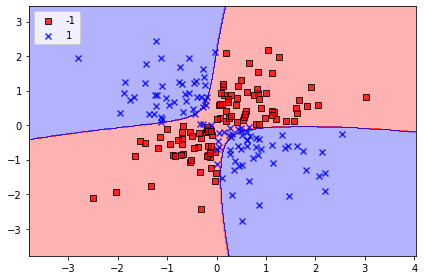

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

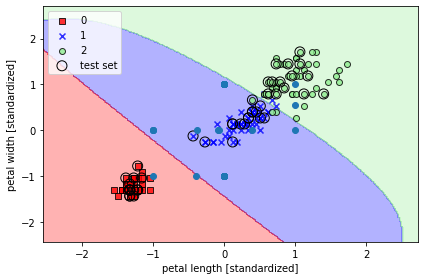

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

gamma 값을 작게했을때 RBF 커널 SVM 모델이 만든 결정경계가 샘플에서 비교적 멀어지고 부드러움

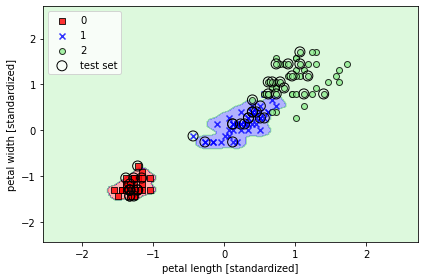

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

gamma값을 크게 했을때 결정경계가 샘플에 가까워지고 구불구불해짐

> 이런 분류기는 훈련 데이터에서는 적합하지만 본적 없는 데이터에서는 일반화 오차가 높음



# 결정 트리 학습

## 정보 이득 최대화-자원을 최대로 활용하기

결정 트리 분류기: 훈련 데이터의 특성을 기반으로 샘플의 클래스 레이블을 추정(질문을 통한 학습)

*   날씨는?
*   꽃받침 너비가 3cm 보다 큰가?


---

결정 알고리즘 : 트리의 루트에서 시작해서 정보 이득이 최대가 되는 특성으로 데이터를 나눔

*   반복 과정을 통해 리프노드가 순수해 질때까지 모든 자식 노드에서 이 분할작업을 반복

---

정보이득: 부모 노드의 불순도와 자식노드의 불순도 합의 차이

---

클래스 분포가 균등하면 엔트로피(어떤 집합의 무질서 정도)는 최대

*   만약 이진 클래스일 경우 P(i=1|t)=1, P(i=0|t)=0 이면 엔트로피는 0
*   P(i=1|t)=0.5, P(i=0|t)=0.5 이면 엔트로피는 1
*   즉, 엔트로피 조건은 트리의 상호 의존 정보를 나타내는 것

---
이진 결정 트리에는 세개의 불순도 지표가 있고 분할조건은 지니 불순도, 엔트로피, 분류 오차가 있음


*   시나리오에 따라 순수도를 비교할수있는데 지니 불순도는 더 순수한 쪽에 값이 높음
*   완벽하게 순수하다면 엔트로피=0, 지니 불순도=0
*   지니 불순도가 엔트로피와 분류 오차의 중간


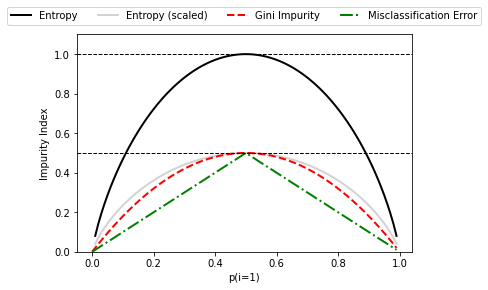

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## 결정 트리 만들기

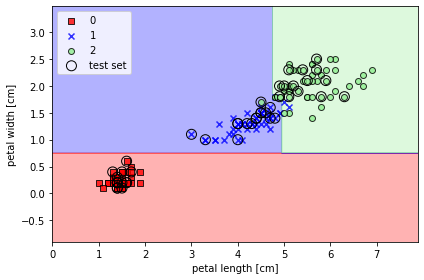

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, # 트리의 한계깊이 제한
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test)) #배열은 위에서 아래로 붙이기(vertical)
y_combined = np.hstack((y_train, y_test)) #배열을 왼쪽에서 오른쪽으로 붙이기(holizental)
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, #색 추가
                           rounded=True,# 상자 모서리의 라운드 처리
                           class_names=['Setosa', #각 조드에 다수 클래스 레이블 이름 표시
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', #분할 기준에 특성 이름 표시
                                          'petal width'],
                           out_file=None) # tree.dot 중간파일을 디스크에 만들지 않고 dot 데이터를 바로 dot_data 변수에 할당
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

![붓꽃 데이터셋의 결정 트리](https://github.com/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch03/tree.png?raw=1 "붓꽃 데이터셋의 결정 트리")

## 랜덤 포레스트로 여러 개의 결정 트리 연결하기

랜덤 포레스트: 결정 트리의 앙상블

*   여러 개의 결정 트리를 평균 내는것이 목적

*   개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 성능을 높이고 과대적합의 위험을 줄임

---

랜덤 포레스트 알고리즘 네단계

1.   n개의 랜덤한 부트스트랩 샘플을 뽑음(중복 허용)
2.   부트스트랩 샘플에서 결정트리를 학습

> 중복을 허용하지 않고 랜덤하게 d개의 특성 선택

> 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할


3.   단계 1,2 k번 반복
4.   각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당

---


각각의 결정 트리를 훈련할 때 다른점은 모든 특성을 평가하는것이 아닌 랜덤하게 선택된 일부 특성만 사용

---

앙상블 모델이 매우 안정되어 있으므로 신경 써야 할 파라미터는 트리 개수 뿐이다

> 부트스트랩 샘플 크기가 감소하면 랜덤 포레스트의 무작위성이 증가하고 과대적합의 영향이 줄어듬

> 하지만 일반적으로 부트스 트랩 샘플이 작을수록 랜덤 포레스트의 성능은 저하된다.

> 훈련 성능과 테스트 성능 사이에 격차가 작아지지만 테스트 성능이 감소하기 때문

---
대부분의 라이브러리에서는 부트스트랩 샘플 크기를 원본 훈련세트의 샘플 개수와 동일하게 한다

> 부트스트랩 샘플 크기가 감소하면 랜덤 포레스트의 무작위성이 증가하고 과대적합의 영향이 줄어듬

> 하지만 일반적으로 부트스 트랩 샘플이 작을수록 랜덤 포레스트의 성능은 저하된다.

> 훈련 성능과 테스트 성능 사이에 격차가 작아지지만 테스트 성능이 감소하기 때문

---
대부분의 라이브러리에서는 부트스트랩 샘플 크기를 원본 훈련세트의 샘플 개수와 동일하게 한다
> 이렇게 하면 균형잡힌 편향 분산 트레이드오프를 얻을 수 있음.












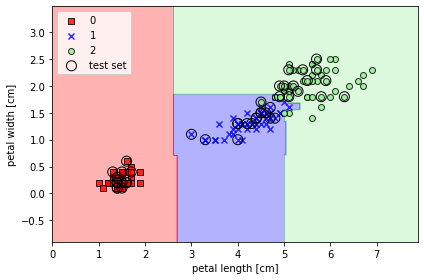

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', #criterion:기준(지니 불순도를 노드를 분할하는 불순도 지표로 사용)
                                n_estimators=25, #25개의 결정트리를 사용하여 랜덤 포레스트를 훈련
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# K-최근접 이웃: 게으른 학습 알고리즘 VV


*훈련데이터에서 판별 함수를 학습하는 대신 훈련 데이터셋을 메모리에 저장하는 방식



1. 숫자 k와 거리 측정 기준을 선택
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾기
3. 다수결 투표를 통해 클래스 레이블을 할당

---

선택한 거리 측정 기준에 따라서 KNN알고리즘이 훈련 데이터셋에서 분류하려는 포인트와 가장 가까운 (가장 비슷한) 샘플 k개를 찾음. 새로운 데이터 포인트의 클래스 레이블은 이 k개의 최근접 이웃에서 다수결 투표를 하여 결정.

---

단, 조심할 부분은 KNN은 차원의 저주 때문에 과대적합되기 쉬움

> 차원의 저주: 고정된 크기의 훈련 데이터셋이 차원이 늘어남에 따라 특성공간이 점점 희소해짐

-> 고차원 공간에서는 가장 가까운 이웃이라도 좋은 추정 값을 만들기에는 너무 멀리 떨어져있기때문








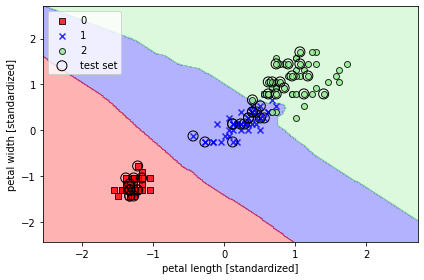

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, #5개의 이웃 지정
                           p=2,                #p=1: 맨해튼 거리, p=2: 유클리디안 거리
                           metric='minkowski') # minkowski 거리: 유클리디안 거리와 맨해튼 거리를 일반화 한것(거리측정 기준을 metric 매개변수로 지정가능)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 96
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()